(One_D_Pipe_Flow)=
# Lecture5_1D_Pipe_Flow

In [3]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## Channel Flow

We consider the one-dimensional ﬂow of a Newtonian viscous ﬂuid in a channel between parallel plates as a model for channel ﬂow. 

<img src="img/F61.PNG" width="500">
Figure 6.1: (a) The force balance on a layer of ﬂuid in a channel with an applied pressure gradient. (b) A typical velocity proﬁle.

For a Newtonian ﬂuid with constant viscosity $\mu$, the shear stress $\tau$ at any location in the channel is given by


$$\tau =\mu \frac{d u}{dy}$$ (equa1)

It is not hard to prove that

$$\frac{d \tau}{d y} = \frac{dp}{dx} = -\frac{p_1-p_0}{l}$$(eq2)

Combining the equations {eq}`equa1` and {eq}`eq2`, and integrating the result we have the velocity $u$ profile as a function of $y$:

$$u=\frac{1}{2\mu}\frac{dp}{dx}y^2+c_1y+c_2$$ (eq3)

To evaluate the constants, we must satisfy the boundary conditions. For example, for a no-slip boundary conditions as shown in figure 6.1, a viscous ﬂuid in contact with a solid boundary must have the same velocity as the boundary, so that $u=0$ at $y=h$ and $u=u_0$ at $y =0$. Hence, the equation becomes

$$u=\frac{1}{2\mu}\frac{dp}{dx}(y^2-hy)-\frac{u_0y}{h}+u_0$$(eq4)

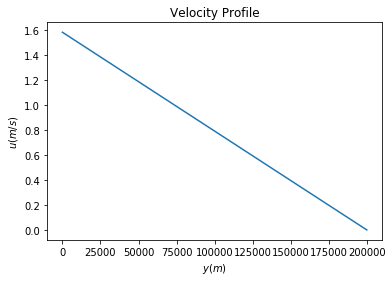

In [3]:
import numpy as np
import matplotlib.pyplot as plt
N  = 10000    # number of points to plot (ignore)
mu = 4*(10**19)    # viscosity
dpdx = 0    # when pressure difference = 0, known as Couette ﬂow
h = 200000    # thickness of channel (m)
u0 = 1.5844   # boundary (max) velocity (m/s)

def main():
    y = np.linspace(0, h, N)
    
    u = (1/(2*mu)) * dpdx * (y*y - h*y) - (u0*y)/(h) + u0

    plt.figure()
    plt.plot(y, u)
    plt.xlabel('$y (m)$')
    plt.ylabel('$u (m/s)$')
    plt.title('Velocity Profile')
    
    plt.show()

if __name__ == '__main__':
    main()

## Problem 6.1

Show that the mean velocity in the channel is given by
$$\bar{u}=-\frac{h^2}{12\mu}\frac{dp}{dx}+\frac{u_0}{2}$$(eq5)

This can be easily proved by integrating velocity equation {eq}`eq4` wrt. $y$ from $0$ to $h$, and then divided by the thickness of channel $h$

[0.00000000e+00 2.00020002e+01 4.00040004e+01 ... 1.99959996e+05
 1.99979998e+05 2.00000000e+05]


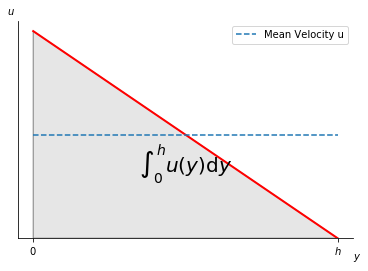

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


def velocity_u(y):
    return (1/(2*mu)) * dpdx * (y*y - h*y) - (u0*y)/(h) + u0


a, b = 0, h  # integral limits
y = np.linspace(a, b, N)
print(y)
u = velocity_u(y)

fig, ax = plt.subplots()
ax.plot(y, u, 'r', linewidth=2)
ax.set_ylim(bottom=0)

def mean_u(a,b,y):
    bin_size = (b-a)/N
    area = 0
    for iy in y:
        u = velocity_u(iy)
        area += u * bin_size
    return area/(b-a)

x_coordinates = [a, b]
y_coordinates = [mean_u(a,b,y), mean_u(a,b,y)]

ax.plot(x_coordinates, y_coordinates, linestyle='dashed',label='Mean Velocity u')
ax.legend()


# Make the shaded region
ix = np.linspace(a, b)
iy = velocity_u(ix)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

ax.text(0.5 * (a + b), 0.5, r"$\int_0^h u(y)\mathrm{d}y$",
        horizontalalignment='center', fontsize=20)

fig.text(0.9, 0.05, '$y$')
fig.text(0.1, 0.9, '$u$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$0$', '$h$'))
ax.set_yticks([])


plt.show()

## Problem 6.2

Derive a general expression for the shear stress $\tau$ at any location $y$ in the channel.

This can be easily derived by using equation {eq}`equ1`, in which the velocity $u$ is expressed by equation {eq}`eq4`. Hence the result is

$$\tau(y)=\frac{1}{2}\frac{dp}{dx}(2y-h) - \mu\frac{u_0}{h}$$ (eq6)

 What are the simpliﬁed forms of $\tau$ for Couette ﬂow and for the case $u_0 = 0$?


Since we know that the pressure difference $\frac{dp}{dx}=0$ for Couette flow, then we can obtain

$$\tau=-\mu\frac{u_0}{h}$$ (eq7)

Also, if the boundary velocity $u_0=0$, then

$$\tau=\frac{1}{2}\frac{dp}{dx}(2y-h)$$ (eq8)

## Problem 6.3

Find the point in the channel $y$ at which the velocity is a maximum.

At this point $y$, the derivative of the velocity (equation {eq}`eq4`) must be zero and the second derivative of it must be negative. Using this relationship, we can rearrange the equation and obtain

$$y=\frac{h}{2}+\frac{u_0\mu_0}{h(dp/dx)}$$(eq9)

## Problem 6.4

<img src="img/F62.PNG" width="500">
Figure 6.3: Unidirectional ﬂow of a constant thickness layer of viscous ﬂuid down an inclined plane.

Consider the steady, unidirectional ﬂow of a viscous ﬂuid down the upper face of an inclined plane. Assume that the ﬂow occurs in a layer of constant thickness h, as shown in figure 6.3. Show that the velocity proﬁle is given by

$$u(y)=\frac{\rho g sin\alpha}{2\mu}(h^2-y^2)$$(eq10)

where $y$ is the coordinate measured perpendicular to the inclined plane ($y = h$ is the surface of the plane), $\alpha$ is the inclination of the plane to the horizontal, and $g$ is the acceleration of gravity. 

Imagine we have a tiny rectangle in the liquid as shown in figure 6.3, there would be three forces acting on this body: the dragging force $F_{\tau(y)}$ to the downhill direction caused by shear stress $\tau(y)$, the gravitational force $F_g sin\alpha$ pulling it to the downhill direction and the resisting drag force acting uphill $-F_{\tau(y+\delta y)}$ that is due to the shear stress $\tau(y+\delta y)$:

$$F_{\tau(y)}=l*\tau(y)$$(eq11)

$$-F_{\tau(y+\delta y)}=-l*\tau(y+\delta y)=-l*(\tau(y)+\frac{d\tau}{dy}*\delta y)$$(eq12)

$$F_g sin \alpha = mg*sin\alpha =v\rho*g*sin\alpha= \delta y * l * \rho * g * sin\alpha$$(eq13)

If we assume that the fluid flows in a constant velocity, that is, there is zero acceleration, then the net forces in the x-direction would be 0, which means the sum of the equations {eq}`eq11`, {eq}`eq12` and {eq}`eq13` would be zero.

$$\sum F_x = F_{\tau(y)} - F{\tau(y+\delta y)} + F_g*sin\alpha = 0$$(eq14)

Rearrange equation {eq}`eq14`, we can obtain

$$\frac{d\tau}{dy}=-\rho g sin\alpha$$(eq15)

Applying the shear stress from equation {eq}`eq1` into equation {eq}`eq15`, we have

$$\mu \frac{d^2 u}{d y^2} = -\rho g sin\alpha$$(eq16)

Integrate equation {eq}`eq16` and we have

$$\frac{du}{dy}=-\frac{\rho g sin\alpha}{\mu}y+C_1$$ (eq17)

Recall equation {eq}`eq1`, $\frac{du}{dy}$ is related to shear stress $\tau$. So we can apply the free surface condition ($\tau=0$ at $y=0$), and obtain the constant $C_1 = 0$.

Integrate equation {eq}`eq16` again, we have

$$u(y) = -\frac{\rho g sin\alpha}{2\mu}y^2+C_1 y+C_2$$(eq18) 
where $C_1=0$ from the free surface condition. 

Then, we apply no-slip condition ($u=0$) at $y=h$, and obtain $C_2$.

$$0 =  -\frac{\rho g sin\alpha}{2\mu}h^2+C_2$$(eq19)

Finally, we plug in $C_1$ and $C_2$ into equation {eq}`eq18`, we can show that:

$$u (y) = \frac{\rho g sin\alpha}{2\mu}(h^2-y^2)$$(eq20)

It is not hard to obtain the mean veolocity in the layer by integrating the equation {eq}`eq20` from $0$ to $h$ and then divide it by $h$:

$$
\bar{u} = \frac{\rho g h^2 sin\alpha}{3\mu}
$$(eq21)

What is the thickness of the layer whose rate of flow down the incline is $Q$ (per unit width in the direction perpendicular to the figure plane)?

$$Q = \bar{u} h$$(eq22)

Rearrange we get

$$h = (\frac{3\mu Q}{\rho g sin\alpha})^{1/3}$$(eq23)

## Pipe Flow

With subsequent applications to ﬂows in aquifers and volcanic conduits in mind, we next consider viscous ﬂow through a circular pipe. 

<img src="img/F66.PNG" width="600">
Figure 6.6: Poiseuille ﬂow through a circular pipe.

If we assume the fluid flows in constant velocity, then the driving force and resisting force should be balanced like this

$$(p_1-p_0)\pi r^2 = -\tau * 2\pi r l$$(eq24)

If we rearrange the equation, we have the shear stress

$$-\tau = \frac{(p_1-p_0)\pi r^2}{2\pi r l} = \frac{r}{2}\frac{p_1-p_0}{l} = \frac{r}{2}\frac{dp}{dx}$$(eq25)
where dp/dx is the pressure gradient along the pipe.

In the cylindrical geometry in Figure 6.6, the shear stress $\tau$ is directly proportional to the radial gradient of the velocity $u$

$$
\tau=\mu\frac{du}{dr}
$$(_eq26)

Combining equations {eq}`eq25` and {eq}`_eq26`, we have

$$\frac{du}{dr}=\frac{r}{2\mu}\frac{dp}{dx}$$(eq27)

which can be integrated to give

$$u(r)=-\frac{1}{4\mu}\frac{dp}{dx}(R^2-r^2)$$(eq28)

We used the condition $u = 0$ at $r = R$. The velocity proﬁle in the pipe is a parabaloid of revolution; it is known as Poiseuille ﬂow. 

It is not hard to get the following quantities:

$$Q=\int^R_0 2\pi r u dr = - \frac{\pi R^4}{8\mu}\frac{dp}{dx} = \pi R^2 \bar{\mu}$$(eq29)

where $\mu$ is the mean velocity:

$$\bar{\mu}=-\frac{R^2}{8\mu}\frac{dp}{dx}=\frac{1}{2}u_{max}$$(eq30)
and $u_{max}$ is the maximum velocity.

$$u_{max}=-\frac{R^2}{4\mu}\frac{dp}{dx}$$(eq31)

It is often convenient in ﬂuid mechanics to work in terms of dimensionless variables. The relation between the mean velocity in the pipe and the pressure gradient {eq}`eq30` can be put into standard dimensionless form by introducing two quantities: a dimensionless pressure gradient or friction factor f and the Reynolds number Re. The friction factor is deﬁned as 

$$f=\frac{-4R}{\rho\bar{\mu}^2}\frac{dp}{dx}$$(eq32)

and the Reynolds number is given by

$$Re = \frac{\rho \bar{u}D}{\mu}$$(eq33)
where $D=2R$ is the pipe diameter.

Critical $Re$ is around $2200$ for pipe flow, above which the flow is turbulent and below which laminar. Although this number depends on the geometry of the pipe. Theoretically, for laminar flow, the relationship between $f$ and $Re$ is  

$$f = \frac{64}{Re}
$$(eq34)

Empirically, for turbulent flow, the relationship between $f$ and $Re$ is

$$f=0.3164Re^{-1/4}$$(eq35)

## Problem 6.7

Determine $Re$ for asthenoshpheric type channel flow, assuming: $\mu=4*10^{19}Pa*s, \rho=3200 kg/m^3$, channel thickness is $200 km$ and the flow is driven solely by $50 mm/yr$ of motion of the overlying plate. 

$$Re= \frac{3200*\bar{u}*200000}{4*10^{19}}$$(eq36)

In [6]:
dpdx = 0
mu = 4* 10**19
h = 200000
u0 = 1.5844 * 10 ** (-9)
a,b=0,h
u_bar = mean_u(a,b,y)
print(u_bar)

7.922000000000002e-10


$$Re= \frac{3200*7.92*10^{-10}*200000}{4*10^{19}}= 1.27*10^{-20}$$(eq37)

 This problem illustrates that the viscosity of mantle rock is so high that the Reynolds number is generally small.

## Problem 6.8

<img src="img/F69.PNG" width="400">
Figure 6.9: A semicircular aquifer with a circular cross section (a toroid). A hydrostatic head b is available to drive the ﬂow.


With the parameters provided below, what is the radius of the channel $R$, the average velocity $\bar{u}$ and is the flow laminar or turbulent?

In [7]:
b=50    # m, because the entrance of spring is 50 m above it
Q = 1.667*10**(-3)    # Spring outputs: 100 L/min i.e.1.667*10**(-3) m3/s 
R_prime = 1000    # m, because entrance of spring 2km from outlet

Now, we do not know if the flow is laminar or turbulent, but we can start with assuming the flow is laminar. Hence, the laminar flux is

$$Q = - \frac{\pi R^4}{8\mu}*\frac{dp}{ds} = \frac{\rho g b R^4}{8\mu R^{'}}$$(eq38)

Rearrange the equation we have the radius of the channel $R$ (under the laminar flow assumption)

$$R = \sqrt[4]{\frac{8Q\mu R^{'}}{\rho g b}} = 0.0133 m$$(eq39)

The average velocity is therefore

$$\bar{u} = \frac{Q}{A} = \frac{\rho g b R^4}{8\mu R^{'} \pi R^2} = 3.01 m/s$$ (eq40)

Now, we can verify that if the flow is laminar or turbulent by calculating the $Re$, which is $1.49*10^7$. This is obviously larger than the threshold 2200, so the flow is actually turbulent. Thus, we need to recalculate the channel radius and mean velocity under the assumption that the flow is turbulent using the equation {eq}`eq35`.

Plugging in the $f$ (equation {eq}`eq32`) and $Re$ (equation {eq}`eq33`) we defined earlier into the relationship in {eq}`eq35`, we have the mean velocity $\bar{u}$ after rearranging

$$\bar{u} = \frac{2^{9/7}R^{5/7}\frac{dp}{dy}^{4/7}}{0.3164^{4/7}\mu^{1/7}\rho^{3/7}} = 0.84 m/s$$(eq41)

Using the simple relationship in the equation {eq}`eq40`, we can obtain the area, and thus the radius ($R=0.025m$) of the channel.

## Problem 6.9

<img src="img/Rising_Magma1.PNG" width="500">
Figure 6.10

Determine the rate at which magma flows up a twodimensional channel of width $d$ under the buoyant pressure gradient $-(\rho_s- \rho_l)g$. Assume laminar flow.


Again, we can assume that the fluid is steady and solve the force balance equation

$$\sum F_y = F_{\tau(x)} - F{\tau(x+\delta x)} + F_p = 0$$ (eq42)

$$F_{\tau(x)}=\tau(x)*l =\mu \frac{d u}{dx}*l$$(eq43)

$$F_{\tau(x+\delta x)}=\tau(x+\delta x)*l= (\tau(x)+\frac{d \tau}{d x}\delta x*l =\mu (\frac{d u}{dx}+\frac{d^2u}{dx^2})*l$$(eq44)

$$F_p = (\rho_s-\rho_l)g*l*\delta x $$ (eq45)

Put equations {eq}`eq43`, {eq}`eq44` and {eq}`eq45` into {eq}`eq42`, we can obtain

$$\frac{d^2u}{dx^2} = \frac{(\rho_s-\rho_l)g}{\mu}$$(eq46)

Integrating it twice we have

$$u(x) = \frac{(\rho_s-\rho_l)g}{2\mu}x^2 + C_1 x + C_2$$(eq47) 

Because of the symmetry of the velocity profile, we can believe that $C_1$ is zero, otherwise the equation {eq}`eq47` would not be symmetric. And plugging in the no-slip boundary condition where $u=0$ at $x=\pm\frac{d}{2}$, we have $C_2 = - \frac{(\rho_s-\rho_l)g}{8\mu}d^2$.

As a result, the velocity profile for the channel is

$$u(x) = \frac{(\rho_s-\rho_l)g}{2\mu}x^2 - \frac{(\rho_s-\rho_l)g}{8\mu}d^2$$(eq48)

$$\bar{u}=\frac{1}{d}\int^{d/2}_{-d/2} u(x) dx = \frac{(\rho_s-\rho_l)g}{12\mu}d^2$$(eq49)

$$Q = \bar{u} d = \frac{(\rho_s-\rho_l)g}{12\mu}d^3$$(eq50)